In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smagni","key":"eb7eafd59b1120195c28192cf629a2c9"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 98% 369M/376M [00:09<00:00, 31.0MB/s]
100% 376M/376M [00:09<00:00, 41.7MB/s]


In [ ]:
!unzip '/content/animal-image-datasetdog-cat-and-panda.zip'

In [19]:
!rm -rf '/content/animals/animals'
!rm -rf '/content/animals/images'

# Start

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [20]:
def img_preprocess(img_path, img_label):
    img = cv2.imread(img_path) # read
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR --> RGB
    img = cv2.resize(img, (200, 200), cv2.INTER_AREA) # resize
    img = img/255.0 #min-max scalling

    X_train.append(img)
    y_train.append(img_label)

In [21]:
base_path = '/content/animals/'

In [22]:
X_train = []
y_train = []
for animal in tqdm(os.listdir(base_path)):
    if animal == '.ipynb_checkpoints' :
        continue
    for img in os.listdir(base_path+animal):
        image_path = base_path+animal+'/'+img
        img_preprocess(image_path, animal)

100%|██████████| 3/3 [00:13<00:00,  4.57s/it]


In [23]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [24]:
X_train.shape

(3000, 200, 200, 3)

In [25]:
y_train.shape

(3000,)

In [26]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [27]:
y_train

array(['dogs', 'cats', 'dogs', ..., 'cats', 'dogs', 'cats'], dtype='<U5')

In [28]:
def plot(img, label):
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

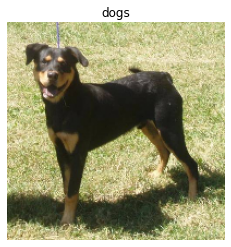

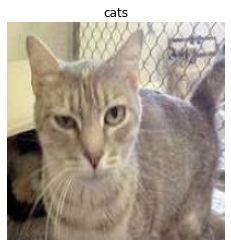

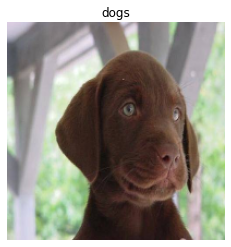

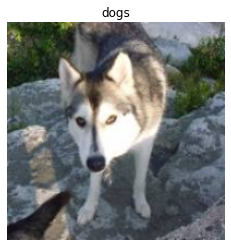

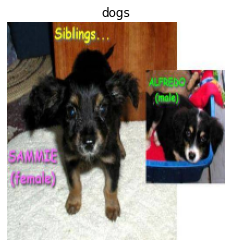

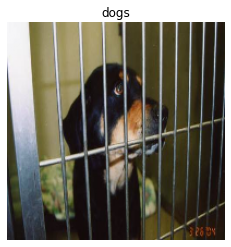

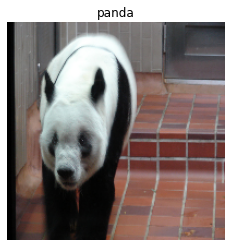

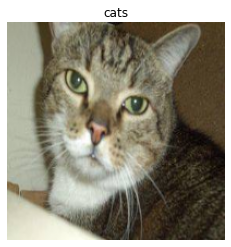

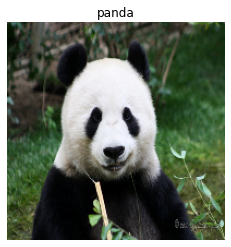

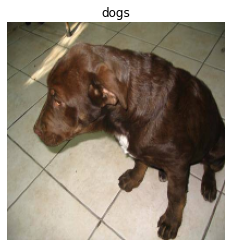

In [29]:
for i in range(10):
    plot(X_train[i], y_train[i])

In [30]:
np.unique(y_train)

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [31]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y_onehot = one.fit_transform(y_train.reshape(-1, 1)).toarray()

In [32]:
X_train.shape, y_train.shape

((3000, 200, 200, 3), (3000,))

In [33]:
X_train.shape, y_onehot.shape

((3000, 200, 200, 3), (3000, 3))

CNN

In [74]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [88]:
model = Sequential()
# conv 1
model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (200, 200, 3)))
model.add(Conv2D(16, (3,3), activation = "relu"))
#pooling
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate= 0.3))

# conv 2
model.add(Conv2D(16, (3,3), activation = "relu"))
model.add(Conv2D(16, (3,3), activation = "relu"))
#pooling
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate= 0.3))

model.add(Flatten())

model.add(Dense(10, activation= 'relu'))
# output layer
model.add(Dense(3, activation = 'softmax'))

In [89]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 196, 196, 16)      4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 94, 94, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 47, 47, 16)      

In [90]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [91]:
model.fit(X_train, y_onehot, batch_size= 32, epochs= 10, validation_split= 0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.9862 - accuracy: 0.5038 - val_loss: 0.8673 - val_accuracy: 0.5267
Epoch 2/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.7911 - accuracy: 0.5879 - val_loss: 0.7517 - val_accuracy: 0.5617
Epoch 3/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.7501 - accuracy: 0.5962 - val_loss: 0.7084 - val_accuracy: 0.5950
Epoch 4/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.7013 - accuracy: 0.6304 - val_loss: 0.7205 - val_accuracy: 0.5917
Epoch 5/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.6803 - accuracy: 0.6333 - val_loss: 0.7117 - val_accuracy: 0.6200
Epoch 6/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.6236 - accuracy: 0.6592 - val_loss: 0.7113 - val_accuracy: 0.5950
Epoch 7/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.5803 - accu

In [60]:
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [92]:
val_loss = np.array(model.history.history['val_loss'])
val_accuracy = np.array(model.history.history['val_accuracy'])
loss = np.array(model.history.history['loss'])
accuracy = np.array(model.history.history['accuracy'])

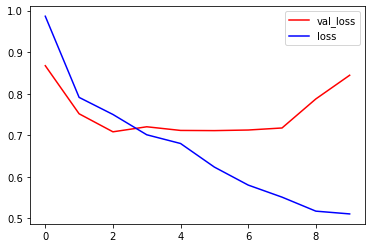

In [93]:
plt.plot(val_loss, c = 'r', label = 'val_loss')
plt.plot(loss, c = 'b', label = 'loss')
plt.legend()
plt.show()

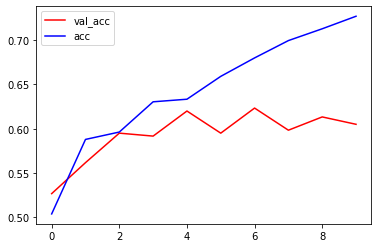

In [94]:
plt.plot(val_accuracy, c = 'r', label = 'val_acc')
plt.plot(accuracy, c = 'b', label = 'acc')
plt.legend()
plt.show()